In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/moltean/fruits")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: fotimazikirova
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/moltean/fruits


100%|██████████| 964M/964M [00:14<00:00, 68.3MB/s]


In [ ]:
import os

dataset_path = "/content/fruits/fruits-360_dataset_original-size/fruits-360-original-size"


print("Papkadagi fayllar:", os.listdir(dataset_path))

Papkadagi fayllar: ['readme.md', 'Training', 'Validation', 'Meta', 'Papers', 'Test']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory('/content/fruits/fruits-360_dataset_original-size/fruits-360-original-size/Training', target_size=(64, 64), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('/content/fruits/fruits-360_dataset_original-size/fruits-360-original-size/Test', target_size=(64, 64), batch_size=32, class_mode='categorical')


Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))


model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 686,296 (2.62 MB)

 Trainable params: 686,296 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 88s 432ms/step - accuracy: 0.1965 - loss: 2.5756 - val_accuracy: 0.7087 - val_loss: 0.8763
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 141s 433ms/step - accuracy: 0.6707 - loss: 0.9862 - val_accuracy: 0.9039 - val_loss: 0.2534
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 146s 452ms/step - accuracy: 0.8138 - loss: 0.5193 - val_accuracy: 0.9688 - val_loss: 0.1354
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 192s 712ms/step - accuracy: 0.8673 - loss: 0.3764 - val_accuracy: 0.9768 - val_loss: 0.0724
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 84s 425ms/step - accuracy: 0.8800 - loss: 0.3502 - val_accuracy: 0.9466 - val_loss: 0.1449
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 146s 449ms/step - accuracy: 0.9166 - loss: 0.2393 - val_accuracy: 0.9605 - val_loss: 0.1159
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 134s 404ms/step - accuracy: 0.9279 - loss: 0.2134 - val_accuracy: 0.9974 - val_loss: 0.0190
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 408ms/step - accuracy: 0.9380 - loss: 0.1680 

In [ ]:
model.save('fruits_classifier_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


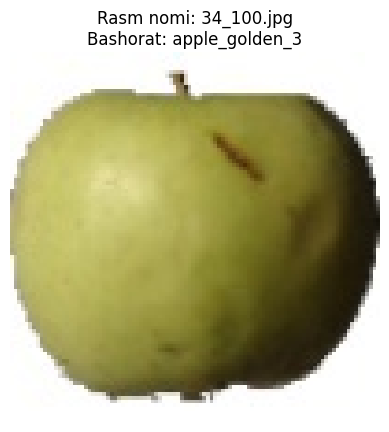

Rasm nomi: 34_100.jpg
Bashorat: apple_golden_3


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

loaded_model = load_model('fruits_classifier_model.h5')

img_path = '/content/fruits/fruits-360_dataset_100x100/fruits-360/Test/Apple Golden 3/34_100.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


image_name = os.path.basename(img_path)


prediction = loaded_model.predict(img_array)
predicted_class = np.argmax(prediction)
class_name = list(train_generator.class_indices.keys())[predicted_class]


plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f"Rasm nomi: {image_name}\nBashorat: {class_name}")
plt.show()

print(f"Rasm nomi: {image_name}")
print(f"Bashorat: {class_name}")


In [ ]:
loss, accuracy = model.evaluate(test_generator)

print(f"Test ma'lumotlarida yo'qotish (Loss): {loss}")
print(f"Test ma'lumotlarida aniqlik (Accuracy): {accuracy * 100:.2f}%")


98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.9954 - loss: 0.0209
Test ma'lumotlarida yo'qotish (Loss): 0.01527781318873167
Test ma'lumotlarida aniqlik (Accuracy): 99.71%


98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step


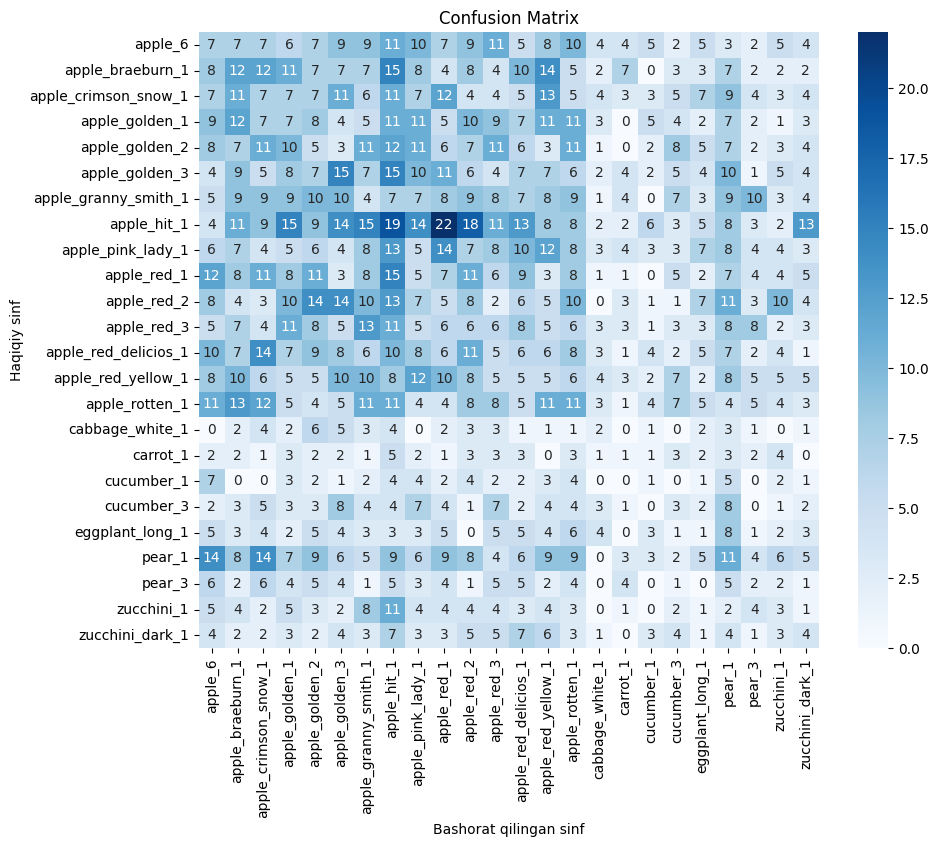


Classification Report:
                      precision    recall  f1-score   support

             apple_6       0.03      0.03      0.03       157
    apple_braeburn_1       0.04      0.04      0.04       160
apple_crimson_snow_1       0.09      0.09      0.09       159
      apple_golden_1       0.05      0.05      0.05       154
      apple_golden_2       0.05      0.05      0.05       154
      apple_golden_3       0.06      0.06      0.06       158
apple_granny_smith_1       0.06      0.06      0.06       160
         apple_hit_1       0.06      0.06      0.06       234
   apple_pink_lady_1       0.03      0.03      0.03       156
         apple_red_1       0.06      0.06      0.06       154
         apple_red_2       0.08      0.08      0.08       159
         apple_red_3       0.06      0.06      0.06       140
apple_red_delicios_1       0.08      0.07      0.08       150
  apple_red_yellow_1       0.03      0.03      0.03       154
      apple_rotten_1       0.05      0.05    

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bashoratlar qilish
y_true = test_generator.classes  # Haqiqiy yorliqlar
y_pred = np.argmax(model.predict(test_generator), axis=1)  # Bashorat qilingan yorliqlar


# Matritsani chiroyli chiqarish
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Bashorat qilingan sinf")
plt.ylabel("Haqiqiy sinf")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))
